In [1]:
import pandas as pd 
import numpy as np

In [2]:
# neural network for prediction? https://www.sciencedirect.com/science/article/pii/S2210832717301485 
df_results = pd.read_csv('csvs/results.csv')
df_shootouts = pd.read_csv('csvs/shootouts.csv') # we won't really be using this data. 
# neutral - TRUE/FALSE column indicating whether the match was played at a neutral venue, isn't necessary either 

In [3]:
df_results['date'] = pd.to_datetime(df_results['date'])
df_results.head()

df_results.info()

df_results

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44060 entries, 0 to 44059
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        44060 non-null  datetime64[ns]
 1   home_team   44060 non-null  object        
 2   away_team   44060 non-null  object        
 3   home_score  44059 non-null  float64       
 4   away_score  44059 non-null  float64       
 5   tournament  44060 non-null  object        
 6   city        44060 non-null  object        
 7   country     44060 non-null  object        
 8   neutral     44060 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(2), object(5)
memory usage: 2.7+ MB


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
44055,2022-09-27,Norway,Serbia,0.0,2.0,UEFA Nations League,Oslo,Norway,False
44056,2022-09-27,Sweden,Slovenia,1.0,1.0,UEFA Nations League,Stockholm,Sweden,False
44057,2022-09-27,Kosovo,Cyprus,5.0,1.0,UEFA Nations League,Pristina,Kosovo,False
44058,2022-09-27,Greece,Northern Ireland,3.0,1.0,UEFA Nations League,Athens,Greece,False


In [4]:

# only take the tournaments with "FIFA World Cup" exactly.

df_results = df_results[df_results['tournament'].str.contains('FIFA World Cup')]

df_results.head()
df_results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8674 entries, 1311 to 43882
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        8674 non-null   datetime64[ns]
 1   home_team   8674 non-null   object        
 2   away_team   8674 non-null   object        
 3   home_score  8674 non-null   float64       
 4   away_score  8674 non-null   float64       
 5   tournament  8674 non-null   object        
 6   city        8674 non-null   object        
 7   country     8674 non-null   object        
 8   neutral     8674 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(2), object(5)
memory usage: 618.4+ KB


In [5]:
df_results.head()


# add the year of the column to the tournament column

df_results['tournament'] = df_results['tournament'] + ' ' + df_results['date'].dt.year.astype(str)

df_results.head()

/var/folders/7v/fnty77f15pvft5brytn_pq300000gn/T/ipykernel_59932/903722292.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results['tournament'] = df_results['tournament'] + ' ' + df_results['date'].dt.year.astype(str)


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
1311,1930-07-13,Belgium,United States,0.0,3.0,FIFA World Cup 1930,Montevideo,Uruguay,True
1312,1930-07-13,France,Mexico,4.0,1.0,FIFA World Cup 1930,Montevideo,Uruguay,True
1313,1930-07-14,Brazil,Yugoslavia,1.0,2.0,FIFA World Cup 1930,Montevideo,Uruguay,True
1314,1930-07-14,Peru,Romania,1.0,3.0,FIFA World Cup 1930,Montevideo,Uruguay,True
1315,1930-07-15,Argentina,France,1.0,0.0,FIFA World Cup 1930,Montevideo,Uruguay,True


In [6]:
# we don't need the date, city, country, neutral, and tournament columns.
df_results = df_results.drop(['date', 'city', 'country', 'neutral'], axis=1)

df_results.count()
df_results.head()


# if the away score > home score, then the away team won. otherwise the home team won. put this as a new column called winner

df_results['winner'] = np.where(df_results['away_score'] > df_results['home_score'], df_results['away_team'], df_results['home_team'])

df_results.head()

,home_team,away_team,home_score,away_score,tournament,winner
1311,Belgium,United States,0.0,3.0,FIFA World Cup 1930,United States
1312,France,Mexico,4.0,1.0,FIFA World Cup 1930,France
1313,Brazil,Yugoslavia,1.0,2.0,FIFA World Cup 1930,Yugoslavia
1314,Peru,Romania,1.0,3.0,FIFA World Cup 1930,Romania
1315,Argentina,France,1.0,0.0,FIFA World Cup 1930,Argentina


In [7]:
df_results['winner'].value_counts()

Brazil              182
Germany             174
Argentina           157
Italy               147
Netherlands         138
                   ... 
Mauritius             1
Seychelles            1
Vietnam Republic      1
San Marino            1
Brunei                1
Name: winner, Length: 210, dtype: int64

In [8]:
# turn winner column into a numpy array
y = df_results['winner'].values

y = y.reshape(-1, 1)

# assign each team a number. no duplicates.

y = pd.DataFrame(y)


y = y[0].unique()


# create a dictionary with the team name as the key and the number as the value

y = dict(zip(y, range(1, len(y)+1)))
team_name_dataframe = pd.DataFrame(y, index=[0]).to_csv('csvs/y.csv', index=False)

In [9]:
# match the id number to the team name

df_results = df_results.replace({'winner': y})

df_results

,home_team,away_team,home_score,away_score,tournament,winner
1311,Belgium,United States,0.0,3.0,FIFA World Cup 1930,1
1312,France,Mexico,4.0,1.0,FIFA World Cup 1930,2
1313,Brazil,Yugoslavia,1.0,2.0,FIFA World Cup 1930,3
1314,Peru,Romania,1.0,3.0,FIFA World Cup 1930,4
1315,Argentina,France,1.0,0.0,FIFA World Cup 1930,5
...,...,...,...,...,...,...
43604,Solomon Islands,New Zealand,0.0,5.0,FIFA World Cup qualification 2022,88
43628,Scotland,Ukraine,1.0,3.0,FIFA World Cup qualification 2022,154
43702,Wales,Ukraine,1.0,0.0,FIFA World Cup qualification 2022,35
43868,Australia,Peru,0.0,0.0,FIFA World Cup qualification 2022,76


In [10]:
# https://medium.com/@mishakonovalov111/how-to-predict-football-games-with-python-kinda-1c1b8390340d
# show the counts of the tournament types, remove the ones that say 'qualification'

df_results['tournament'].value_counts()

df_results = df_results[~df_results['tournament'].str.contains('qualification')]

df_results['tournament'].value_counts()

df_results.dropna(inplace=True)

df_results

/var/folders/7v/fnty77f15pvft5brytn_pq300000gn/T/ipykernel_59932/2982979207.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results.dropna(inplace=True)


,home_team,away_team,home_score,away_score,tournament,winner
1311,Belgium,United States,0.0,3.0,FIFA World Cup 1930,1
1312,France,Mexico,4.0,1.0,FIFA World Cup 1930,2
1313,Brazil,Yugoslavia,1.0,2.0,FIFA World Cup 1930,3
1314,Peru,Romania,1.0,3.0,FIFA World Cup 1930,4
1315,Argentina,France,1.0,0.0,FIFA World Cup 1930,5
...,...,...,...,...,...,...
40293,Russia,Croatia,2.0,2.0,FIFA World Cup 2018,51
40294,France,Belgium,1.0,0.0,FIFA World Cup 2018,2
40295,Croatia,England,2.0,1.0,FIFA World Cup 2018,157
40296,Belgium,England,2.0,0.0,FIFA World Cup 2018,30


In [11]:
# create a new column called 'home_win' that is 1 if the home team won and 0 if the away team won

df_results['home_win'] = np.where(df_results['winner'] == df_results['home_team'], 1, 0)
df_results

/var/folders/7v/fnty77f15pvft5brytn_pq300000gn/T/ipykernel_59932/2895088718.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results['home_win'] = np.where(df_results['winner'] == df_results['home_team'], 1, 0)


,home_team,away_team,home_score,away_score,tournament,winner,home_win
1311,Belgium,United States,0.0,3.0,FIFA World Cup 1930,1,0
1312,France,Mexico,4.0,1.0,FIFA World Cup 1930,2,0
1313,Brazil,Yugoslavia,1.0,2.0,FIFA World Cup 1930,3,0
1314,Peru,Romania,1.0,3.0,FIFA World Cup 1930,4,0
1315,Argentina,France,1.0,0.0,FIFA World Cup 1930,5,0
...,...,...,...,...,...,...,...
40293,Russia,Croatia,2.0,2.0,FIFA World Cup 2018,51,0
40294,France,Belgium,1.0,0.0,FIFA World Cup 2018,2,0
40295,Croatia,England,2.0,1.0,FIFA World Cup 2018,157,0
40296,Belgium,England,2.0,0.0,FIFA World Cup 2018,30,0


In [12]:
# create a new column called 'away_win' that is 1 if the away team won and 0 if the home team won
df_results['away_win'] = np.where(df_results['winner'] == df_results['away_team'], 1, 0)

df_results

/var/folders/7v/fnty77f15pvft5brytn_pq300000gn/T/ipykernel_59932/4202212561.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results['away_win'] = np.where(df_results['winner'] == df_results['away_team'], 1, 0)


,home_team,away_team,home_score,away_score,tournament,winner,home_win,away_win
1311,Belgium,United States,0.0,3.0,FIFA World Cup 1930,1,0,0
1312,France,Mexico,4.0,1.0,FIFA World Cup 1930,2,0,0
1313,Brazil,Yugoslavia,1.0,2.0,FIFA World Cup 1930,3,0,0
1314,Peru,Romania,1.0,3.0,FIFA World Cup 1930,4,0,0
1315,Argentina,France,1.0,0.0,FIFA World Cup 1930,5,0,0
...,...,...,...,...,...,...,...,...
40293,Russia,Croatia,2.0,2.0,FIFA World Cup 2018,51,0,0
40294,France,Belgium,1.0,0.0,FIFA World Cup 2018,2,0,0
40295,Croatia,England,2.0,1.0,FIFA World Cup 2018,157,0,0
40296,Belgium,England,2.0,0.0,FIFA World Cup 2018,30,0,0


In [13]:
# get the goal difference home is positive, away is negative

df_results['goaldiff'] = df_results['home_score'] - df_results['away_score']

df_results

/var/folders/7v/fnty77f15pvft5brytn_pq300000gn/T/ipykernel_59932/1503061618.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results['goaldiff'] = df_results['home_score'] - df_results['away_score']


,home_team,away_team,home_score,away_score,tournament,winner,home_win,away_win,goaldiff
1311,Belgium,United States,0.0,3.0,FIFA World Cup 1930,1,0,0,-3.0
1312,France,Mexico,4.0,1.0,FIFA World Cup 1930,2,0,0,3.0
1313,Brazil,Yugoslavia,1.0,2.0,FIFA World Cup 1930,3,0,0,-1.0
1314,Peru,Romania,1.0,3.0,FIFA World Cup 1930,4,0,0,-2.0
1315,Argentina,France,1.0,0.0,FIFA World Cup 1930,5,0,0,1.0
...,...,...,...,...,...,...,...,...,...
40293,Russia,Croatia,2.0,2.0,FIFA World Cup 2018,51,0,0,0.0
40294,France,Belgium,1.0,0.0,FIFA World Cup 2018,2,0,0,1.0
40295,Croatia,England,2.0,1.0,FIFA World Cup 2018,157,0,0,1.0
40296,Belgium,England,2.0,0.0,FIFA World Cup 2018,30,0,0,2.0


In [14]:
# check which id has the most goaldiff

winner_by_mean_score = df_results.groupby('winner')['goaldiff'].mean().sort_values(ascending=False)

In [15]:
winner_by_mean_score = winner_by_mean_score.reset_index()
# use the dictionary keys from before to get the team name

# use y dictionary to get team name from id
winner_by_mean_score['winner'] = winner_by_mean_score['winner'].replace(y)

# reverse the keys with the values
y = {v: k for k, v in y.items()}
y
# replace the id with the team name which is a value 

winner_by_mean_score['winner'] = winner_by_mean_score['winner'].replace(y)

winner_by_mean_score

,winner,goaldiff
0,Bosnia and Herzegovina,2.000000
1,Argentina,1.450980
2,Hungary,1.187500
3,Australia,1.000000
4,Slovakia,1.000000
...,...,...
61,Peru,-1.166667
62,Morocco,-1.250000
63,Turkey,-1.400000
64,Ukraine,-1.500000


In [16]:
# https://www.kaggle.com/datasets/statchaitya/country-to-continent add the continents of the countries 
df_countries = pd.read_csv('csvs/countryContinent.csv', encoding='latin-1')

df_countries = df_countries[['country', 'continent']]

df_countries

,country,continent
0,Afghanistan,Asia
1,ï¿½land Islands,Europe
2,Albania,Europe
3,Algeria,Africa
4,American Samoa,Oceania
...,...,...
244,Wallis and Futuna,Oceania
245,Western Sahara,Africa
246,Yemen,Asia
247,Zambia,Africa


In [17]:
# if the country from df_countries match the winner from winner_by_mean_score, then add the continent to the winner_by_mean_score dataframe

winner_by_mean_score = winner_by_mean_score.merge(df_countries, left_on='winner', right_on='country', how='left')

winner_by_mean_score

,winner,goaldiff,country,continent
0,Bosnia and Herzegovina,2.000000,Bosnia and Herzegovina,Europe
1,Argentina,1.450980,Argentina,Americas
2,Hungary,1.187500,Hungary,Europe
3,Australia,1.000000,Australia,Oceania
4,Slovakia,1.000000,Slovakia,Europe
...,...,...,...,...
61,Peru,-1.166667,Peru,Americas
62,Morocco,-1.250000,Morocco,Africa
63,Turkey,-1.400000,Turkey,Asia
64,Ukraine,-1.500000,Ukraine,Europe


In [18]:
#data cleanup 

#Replace/ add some of the values in the dataframe as they don't match name description.
#  add Iran's continent to the dataframe
#  add Republic of Ireland's continent to the dataframe
# add United States' continent to the dataframe
# add England's continent to the dataframe
# add Russia's continent to the dataframe
# add Scotland's continent to the dataframe
# South Korea's continent to the dataframe
# add Wales' continent to the dataframe
# add North Korea's continent to the dataframe

# remove Yugoslavia, German DR, Czechoslovakia
winner_by_mean_score = winner_by_mean_score[~winner_by_mean_score['winner'].str.contains('Yugoslavia')]
winner_by_mean_score = winner_by_mean_score[~winner_by_mean_score['winner'].str.contains('German DR')]
winner_by_mean_score = winner_by_mean_score[~winner_by_mean_score['winner'].str.contains('Czechoslovakia')]

#replace bosnia and herzegovina with bosnia

winner_by_mean_score = winner_by_mean_score.replace({'winner': 'Bosnia and Herzegovina'}, 'Bosnia')

countrs = ['Iran', 'Republic of Ireland', 'United States', 'England', 'Russia', 'Scotland', 'South Korea', 'Wales', 'North Korea', 'Ivory Coast', 'Northern Ireland']
conts= ['Asia', 'Europe', 'Americas', 'Europe', 'Europe', 'Europe', 'Asia', 'Europe', 'Asia', 'Africa', 'Europe']

for i in range(len(countrs)):
    winner_by_mean_score.loc[winner_by_mean_score['winner'] == countrs[i], 'continent'] = conts[i]

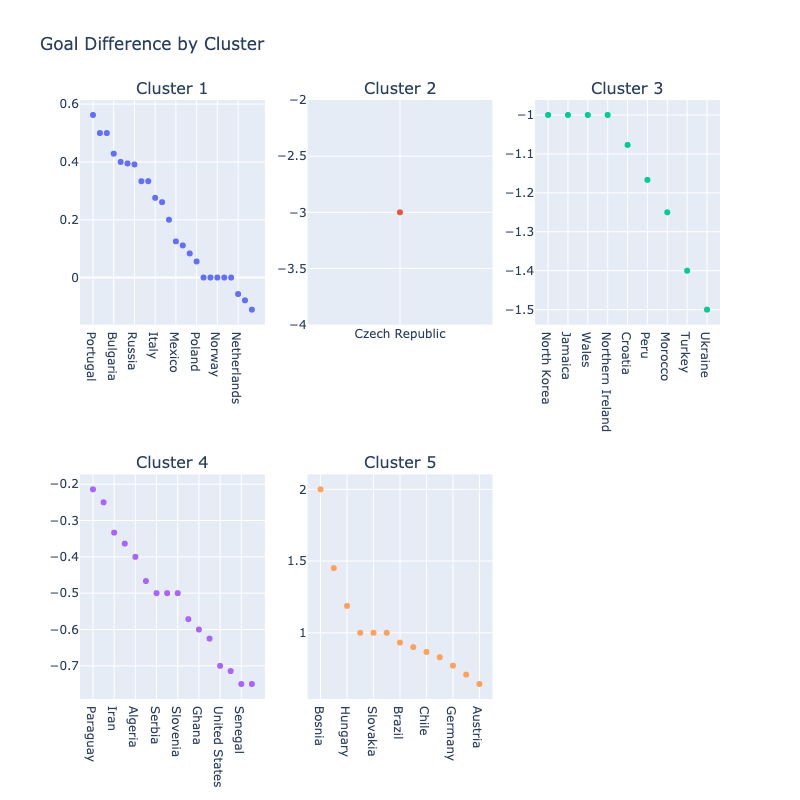

In [19]:
#classify using sklearn using kmeans 
from sklearn.cluster import KMeans
import plotly.express as px
import matplotlib.pyplot as plt


KMeans = KMeans(n_clusters=5, random_state=0).fit(winner_by_mean_score[['goaldiff']])


winner_by_mean_score.drop('country', axis=1, inplace=True)

# plot small multiples of the clusters
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=2, cols=3, subplot_titles=('Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'))

for i in range(0, 5):
    fig.add_trace(go.Scatter(x=winner_by_mean_score[KMeans.labels_ == i]['winner'], y=winner_by_mean_score[KMeans.labels_ == i]['goaldiff'], mode='markers'), row=i//3+1, col=i%3+1)
    
# put gaps between the subplots
fig = fig.update_layout(height=800, width=800, title_text="Goal Difference by Cluster", showlegend=False) 

from PIL import Image

fig.write_image("images/cluster.png")

%matplotlib inline
from IPython.display import Image
Image('images/cluster.png')